In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df = pd.read_csv("/content/openpowerlifting.csv", low_memory=False)

In [6]:
print(df.size)
print(df.head())
print(df.tail())
print(df.info())

413512
              Name Sex Event Equipment   Age AgeClass Division  BodyweightKg  \
0     Abbie Murphy   F   SBD     Wraps  29.0    24-34     F-OR          59.8   
1      Abbie Tuong   F   SBD     Wraps  29.0    24-34     F-OR          58.5   
2   Ainslee Hooper   F     B       Raw  40.0    40-44     F-OR          55.4   
3  Amy Moldenhauer   F   SBD     Wraps  23.0    20-23     F-OR          60.0   
4     Andrea Rowan   F   SBD     Wraps  45.0    45-49     F-OR         104.0   

  WeightClassKg  Squat1Kg  ...  McCulloch  Glossbrenner  IPFPoints  Tested  \
0            60      80.0  ...     324.16        286.42     511.15     NaN   
1            60     100.0  ...     378.07        334.16     595.65     NaN   
2            56       NaN  ...      38.56         34.12     313.97     NaN   
3            60    -105.0  ...     345.61        305.37     547.04     NaN   
4           110     120.0  ...     338.91        274.56     550.08     NaN   

   Country  Federation        Date  MeetCou

In [4]:
df["total/bw ratio"] = df['TotalKg'] / df['BodyweightKg']

In [11]:
print(df.size)
print(df.head())
print(df.tail())
print(df.info())

54087452
              Name Sex Event Equipment   Age AgeClass Division  BodyweightKg  \
0     Abbie Murphy   F   SBD     Wraps  29.0    24-34     F-OR          59.8   
1      Abbie Tuong   F   SBD     Wraps  29.0    24-34     F-OR          58.5   
2   Ainslee Hooper   F     B       Raw  40.0    40-44     F-OR          55.4   
3  Amy Moldenhauer   F   SBD     Wraps  23.0    20-23     F-OR          60.0   
4     Andrea Rowan   F   SBD     Wraps  45.0    45-49     F-OR         104.0   

  WeightClassKg  Squat1Kg  ...  Glossbrenner  IPFPoints  Tested  Country  \
0            60      80.0  ...        286.42     511.15     NaN      NaN   
1            60     100.0  ...        334.16     595.65     NaN      NaN   
2            56       NaN  ...         34.12     313.97     NaN      NaN   
3            60    -105.0  ...        305.37     547.04     NaN      NaN   
4           110     120.0  ...        274.56     550.08     NaN      NaN   

   Federation        Date  MeetCountry  MeetState    

In [7]:
ratioAvg = df['total/bw ratio'].mean()
ratioSD = df['total/bw ratio'].std()
print(ratioAvg)
print(ratioSD)

M = len(df['total/bw ratio'])

ratioNorm = np.random.normal(ratioAvg, ratioSD, M)



5.162297321518315
1.7444517701082707


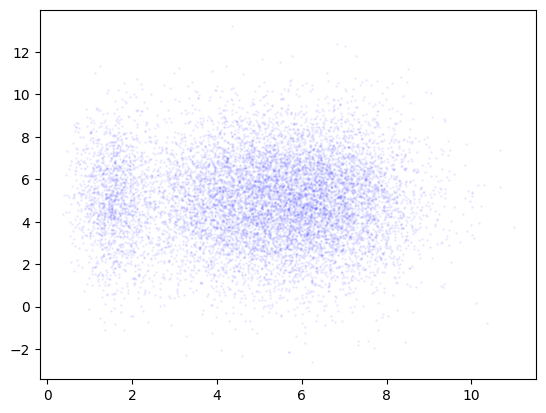

In [9]:
plt.scatter(
    df['total/bw ratio'],
    ratioNorm,
    label='Scatter Plot',
    color='blue',
    marker='o',
    s=1,
    alpha=0.075
    )

Age
10.0    1.167820
13.0    4.064157
14.0    3.801825
15.0    3.927009
16.0    4.609279
          ...   
74.0    3.415407
75.0    2.797912
78.0    3.170103
80.0    3.867235
84.0    2.428256
Name: total/bw ratio, Length: 72, dtype: float64


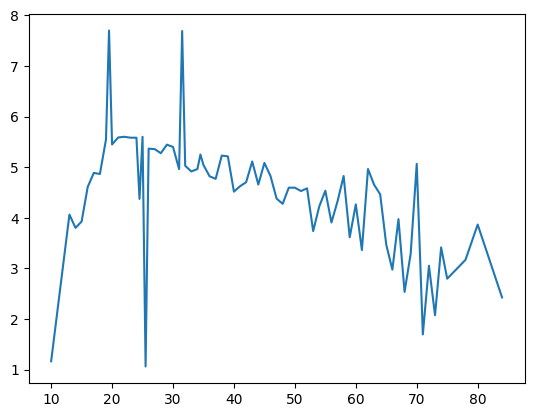

In [8]:
grouped = df.groupby('Age')
print(grouped['total/bw ratio'].mean())

plt.plot(grouped['total/bw ratio'].mean())

In [50]:
means = grouped['total/bw ratio'].mean()
xlist = list(grouped.groups.keys())
x = np.array(xlist).reshape(-1,1)
y = []

for mean in means:
  y.append(mean)

y = np.array(y)

In [45]:
# Specify the degrees of polynomial regression you want to fit
degrees = [1, 2, 3]  # Vary the degrees as needed

# Create a dictionary to store the models and their corresponding predictions
models = {}

# Fit polynomial regression models for each degree
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x)

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to your data
    model.fit(X_poly, y)

    # Predict Y values based on X
    Y_pred = model.predict(X_poly)

    # Store the model and predictions
    models[degree] = {'model': model, 'Y_pred': Y_pred}


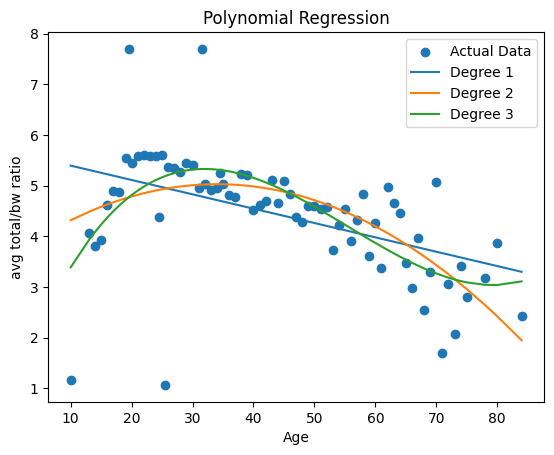

In [47]:
# Plot the data points
plt.scatter(x, y, label='Actual Data')

# Plot the regression lines for different degrees
for degree, model_data in models.items():
    plt.plot(x, model_data['Y_pred'], label=f'Degree {degree}')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('avg total/bw ratio')
plt.title('Polynomial Regression')
plt.legend()

# Show the plot
plt.show()


MeetCountry
Australia        8164
Austria           370
Chile             112
Croatia           130
Germany         12986
Ireland           179
Japan           15594
Mexico            156
Netherlands       176
Slovenia          388
South Africa      445
USA              3782
Ukraine         21389
Wales             218
Name: Name, dtype: int64


Text(0.5, 1.0, 'Powerlifters from each country')

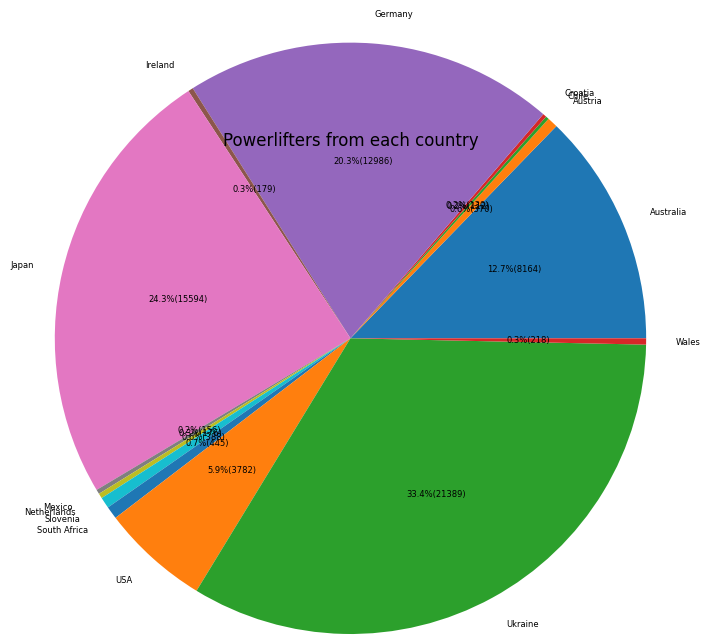

In [34]:
# note how smaller countries clutter the graph. lets create an 'other' category for these countries.
countryCounts = df.groupby('MeetCountry').count()['Name']
print(countryCounts)
plt.pie(
    countryCounts,
    labels=df.groupby('MeetCountry').groups.keys(),
    autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*countryCounts.sum()),
    radius=2,
    textprops={'fontsize': 6}
    )

plt.title('Powerlifters from each country', fontsize=12)

In [54]:
# percent threshold for grouping into 'Other'
p = 1
threshold = (p/100)*countryCounts.sum()

for a,b in df.groupby('MeetCountry')['Name']:
  print(a,b)

Australia 0            Abbie Murphy
1             Abbie Tuong
2          Ainslee Hooper
3         Amy Moldenhauer
4            Andrea Rowan
              ...        
8159        Kristen Scott
8160          Leroy Scott
8161        Shannon Green
8162    Stanislav Korotun
8163    Wulf Breitsameter
Name: Name, Length: 8164, dtype: object
Austria 44777            Martina Pamperl
44778                 Petra Haas
44779               Sonja Herzig
44780        Adriana Bialostocki
44781               Sonja Herzig
                  ...           
46319         Gerhard Holleitner
46320                Andrew Ward
46321    Friðrik Jóhann Gíslason
46322                 Alan Aerts
46323           Richard Frickner
Name: Name, Length: 370, dtype: object
Chile 23249       Karina Garces Herrera
23250         Fernanda Fuenzalida
23251         Fernanda Fuenzalida
23252              Pamela Quezada
23253              Pamela Quezada
                   ...           
23356    Rodrigo Aravena Améstica
23357    R

In [44]:
# most popular federations

groupedFed = df.groupby(['Federation', 'Name']).count().index.droplevel(level=1).value_counts()
print(groupedFed)

for a in groupedFed:
  print(a)


UkrainePF      6284
JPA            5658
BVDK           3526
GPC-AUS        3367
WPF             965
USPF            717
NORCAL          543
RUPC            429
RhinoPC         304
UkrainePA       249
PLZS            171
USA-UA          166
APA             164
WelshPA         129
ADFPA            90
GPA-CRO          81
ACHIPO           70
WPA              51
GPU              48
SSA              45
USSports         27
WPC-Germany      12
Name: Federation, dtype: int64
6284
5658
3526
3367
965
717
543
429
304
249
171
166
164
129
90
81
70
51
48
45
27
12
